In [1]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
DIR = "./"

# Import Data

In [3]:
df_allbirds = pd.read_csv(DIR + "AllBirdsv4.csv")
df_testbirds = pd.read_csv(DIR + "Test Birds Location.csv")

# Preview and preprocess data sets

## All birds recordings

In [4]:
df_allbirds.head()

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123


### Data cleaning

In [5]:
# Replace values that are not digits with ''
df_allbirds['Y'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
# Convert strings to numeric values (here, int)
df_allbirds['Y'] = pd.to_numeric(df_allbirds['Y'])

###  Describe data

In [6]:
print("Number of bird recordings:", len(df_allbirds["File ID"].unique()))
print("Number of distinct bird families:", len(df_allbirds["English_name"].value_counts()))
print("Number of Rose-crested Blue Pipit:", len(df_allbirds[df_allbirds['English_name'] == "Rose-crested Blue Pipit"]))
print("Recording position X range: %d - %d" % (min(df_allbirds["X"]), max(df_allbirds["X"])) )
print("Recording position Y range: %d - %d" % (min(df_allbirds["Y"]), max(df_allbirds["Y"])) )
print("Column names and value types:")
print(df_allbirds.dtypes)

Number of bird recordings: 2081
Number of distinct bird families: 19
Number of Rose-crested Blue Pipit: 186
Recording position X range: 10 - 171
Recording position Y range: 13 - 186
Column names and value types:
File ID               int64
English_name         object
Vocalization_type    object
Quality              object
Time                 object
Date                 object
X                     int64
Y                     int64
dtype: object


## Kasio birds recordings

In [7]:
print(df_testbirds.to_string())

    ID    X    Y
0    1  140  119
1    2   63  153
2    3   70  136
3    4   78  150
4    5   60   90
5    6  126  103
6    7   71  121
7    8   78   62
8    9   61  145
9   10   45   39
10  11  132  106
11  12   61   20
12  13   35  160
13  14   40  125
14  15  110  121


### Data cleaning

In [8]:
# remove unexpected space character in column X and Y names
df_testbirds.rename(index=str, columns={" X": "X", " Y": "Y"}, inplace = True)

### Data description

In [9]:
print("Number of bird recordings:", len(df_testbirds["ID"].unique()))
print("Recording position X range: %d - %d" % (min(df_testbirds["X"]), max(df_testbirds["X"])) )
print("Recording position Y range: %d - %d" % (min(df_testbirds["Y"]), max(df_testbirds["Y"])) )
print("Column names and value types:")
print(df_testbirds.dtypes)

Number of bird recordings: 15
Recording position X range: 35 - 140
Recording position Y range: 20 - 160
Column names and value types:
ID    int64
X     int64
Y     int64
dtype: object


# Processing map image

In [47]:
from PIL import Image
# convert image pixels to black & white
# any value that is not black is assigned the value white
im = plt.imread(DIR+"Lekagul Roadways 2018.bmp")
img = Image.open(DIR+'Lekagul Roadways 2018.bmp').convert('L')
np_img = np.array(img)
np_img[np_img > 0] = 255 #Binarize
np_img[np_img == 0] = 100 #Binarize
binarized_img = Image.fromarray(np_img)

# Plot Birds Distribution on Map

In [20]:
df_pipits = df_allbirds[df_allbirds['English_name'] == "Rose-crested Blue Pipit"]
df_others = df_allbirds[df_allbirds['English_name'] != "Rose-crested Blue Pipit"]

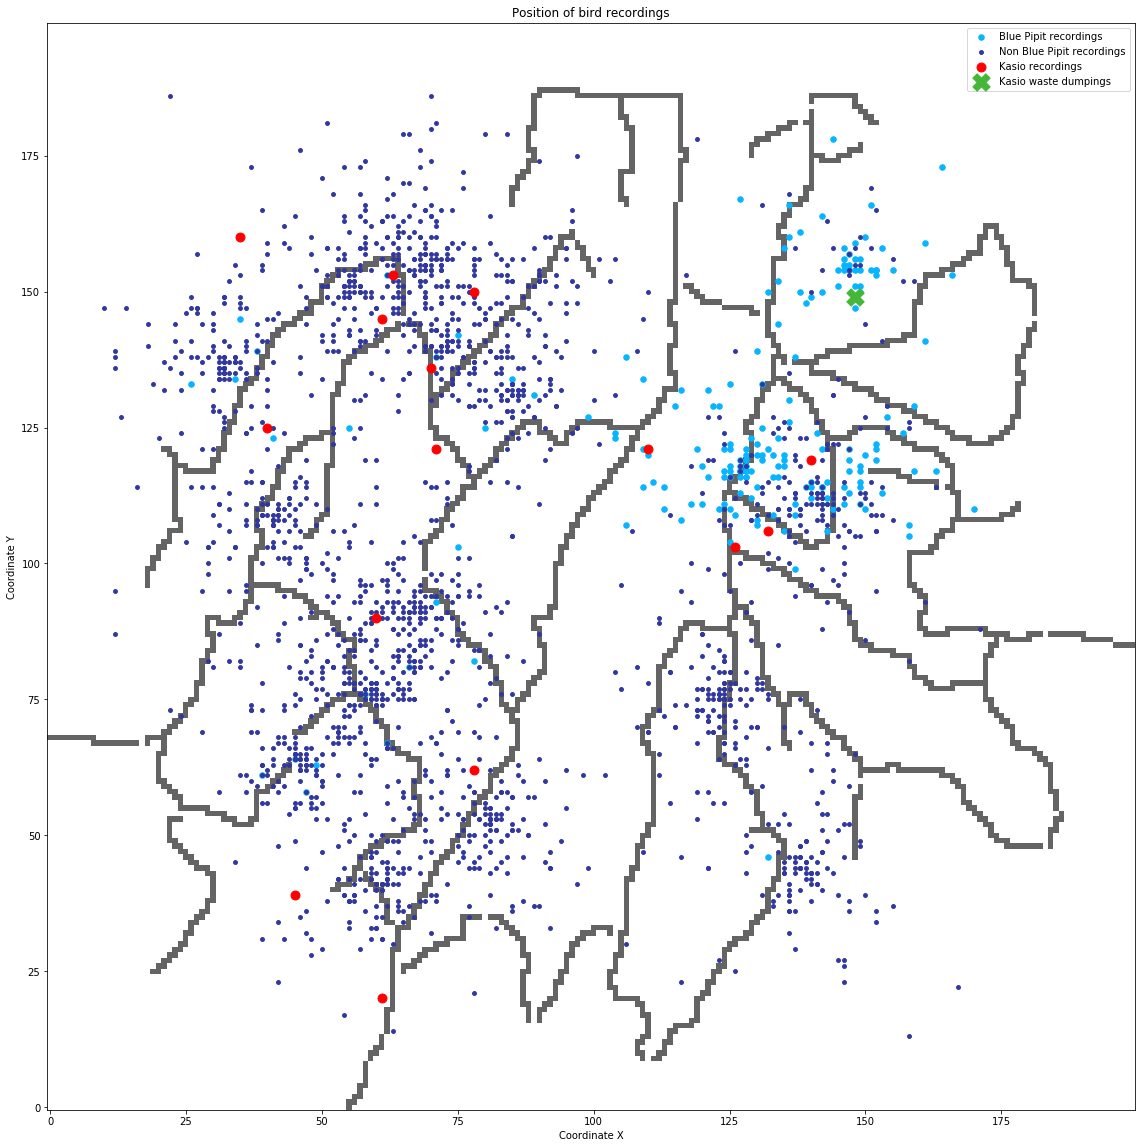

In [58]:
plt.figure(1, [20, 20])
implot = plt.imshow(binarized_img)
plt.scatter(df_pipits["X"], df_pipits["Y"], s=30, c= "#06b4ff", label="Blue Pipit recordings")
plt.scatter(df_others["X"], df_others["Y"], s=15, c="#30379e", label="Non Blue Pipit recordings")
plt.scatter(df_testbirds["X"], df_testbirds["Y"], s=80, c='r', label="Kasio recordings" )
plt.scatter(148, 149, s=300, c='#45b738', label="Kasio waste dumpings", marker ="X")
#dumping = plt.Circle((148, 159), 10, color='y', alpha = 0.3, label = "dumpings")
#plt.gcf().gca().add_artist(dumping)
plt.title("Position of bird recordings")
plt.xlabel("Coordinate X")
plt.ylabel("Coordinate Y")
plt.legend()
plt.gca().invert_yaxis()
plt.show()